In [2]:
# 请先写算法再敲代码，多么痛的领悟！
import matplotlib.pyplot as plt

In [3]:
data_num = 8
data_dimen = 2
data = [[0, 3], [1, 3], [2, 3], [1, 2], [3, 0], [3, 1], [3, 2], [2, 1]]  # 线性数据
#data = [[1, 1], [1, 2], [1, 3], [2, 1], [3, 1], [3, 2], [3, 3], [2, 3]]  # 非线性数据
par_list = [1, 1, 1, 1, -1, -1, -1, -1]  # 数据点初始化类别，1 代表一组，值为正，-1 代表一组，值为负
for i in range(data_num):  # 对每个数据点加一维
    data[i].append(1)
w = [[1 for i in range(data_dimen+1)] for j in range(data_num)]  # 初始化权向量组
index_w = 0
j_w = [0 for i in range(data_num)]  # 存储权向量与数据的内积
for i in range(data_num):
    for j in range(data_dimen+1):
        j_w[i] += w[i][j] * data[i][j]
data_judge = [0 for i in range(data_num)]  # 类别指示器
for i in range(data_num):
    if j_w[i] > 0:
        data_judge[i] = 1
    elif j_w[i] == 0:
        data_judge[i] = 0
    else:
        data_judge[i] = -1
while data_judge != par_list or not w[0]==w[1]==w[2]==w[3]==w[4]==w[5]==w[6]==w[7]:  # 此处w[i]须和data_num保持一致，当满足所有数据点类别正确且所有用户对应权向量一致，则找到解
    for i in range(data_num):
        next_i = (i+1) % data_num
        if data_judge[i] != par_list[i]:  # 找到类别判断错误的数据点，更新权值
            for j in range(data_dimen+1):
                w[i][j] = w[i][j] + par_list[i] * data[i][j]
                index_w += 1
        j_w[next_i] = 0  # 利用新权值更新下一个元素的类别
        for j in range(data_dimen+1):
            j_w[next_i] += w[i][j] * data[next_i][j]
        if j_w[next_i] > 0:
            data_judge[next_i] = 1
        elif j_w[next_i] == 0:
            data_judge[next_i] = 0
        else:
            data_judge[next_i] = -1
        w[next_i] = w[i].copy()  # 更新下一权值
x = [0, 5]
y = []
for i in x:
    if w[0][1] != 0:
        y.append(- w[0][0] * i / w[0][1])

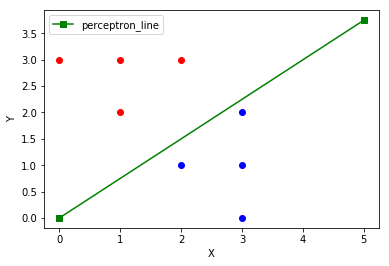

In [4]:
plt.plot(x, y, linestyle='-', label='perceptron_line', color='g', marker='s')  # 分割线
plt.plot([0, 1, 2, 1], [3, 3, 3, 2], 'ro')   # 线性可分数据
plt.plot([3, 3, 3, 2], [0, 1, 2, 1], 'bo')   # 线性可分数据
#plt.plot([1, 1, 1, 2], [1, 2, 3, 1], 'ro')  # 步长为1时，线性不可分数据
#plt.plot([3, 3, 3, 2], [1, 2, 3, 3], 'bo')  # 步长为1时，线性不可分数据
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
print(w[0])  # 输出权值

[-3, 4, 0]
